# Zadanie 2
Klasyfikacja na zbiorze MNIST – kompleksowa analiza modelu.
Na podstawie zbioru danych MNIST, który zawiera cyfrowe obrazy odręcznych cyfr, przygotuj
dane, zbuduj model klasyfikacyjny, a następnie przeprowadź kompleksową ocenę modelu.
• Przygotowanie danych.
o Wczytaj dane, znormalizuj obrazy, podziel na zbiór treningowy i testowy.
• Budowanie modelu:
o Skorzystaj z wielowarstwowej sieci neuronowej (MLP) z wykorzystaniem biblioteki scikit-learn/TensorFlow.
• Ocena modelu:
o Ocen dokładność, narysuj krzywe ROC dla każdej klasy,
o Przedstaw zwizualizowaną macierz pomyłek,
o Zinterpretuj, które cyfry są najczęściej błędnie klasyfikowane i dlaczego.

In [11]:
# Biblioteki do dodania
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sea

from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [13]:
# Wczytanie danych
# Wczytanie danych mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

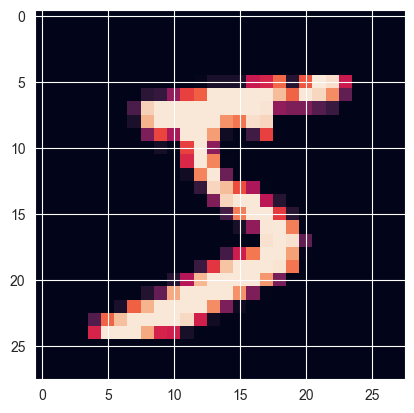

In [14]:
# Przykładowe zdjęcie z naszego zbioru treningowego
plt.imshow(x_train[0])

In [15]:
# Normalizacja danych
x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
# Definicja modelu CNN
model = Sequential([
 Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),
 Flatten(),
 Dense(64, activation='relu'),
 Dense(10, activation='softmax')
])


# Kompilacja modelu
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [19]:
# Trenowanie modelu
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Dokładność klasyfikacji:', test_acc)

Epoch 1/2
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0351 - val_accuracy: 0.9885
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.0283 - accuracy: 0.9917
Dokładność klasyfikacji: 0.9916999936103821


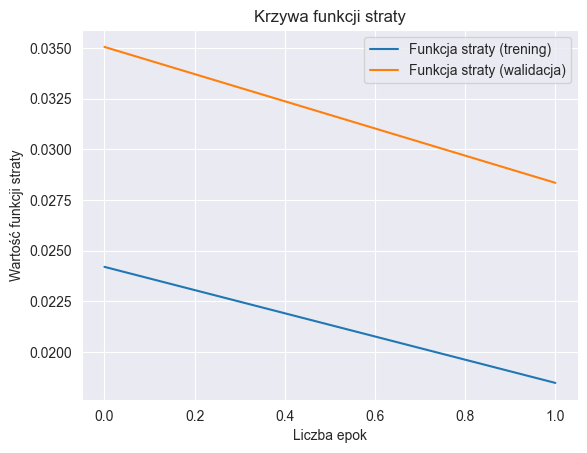

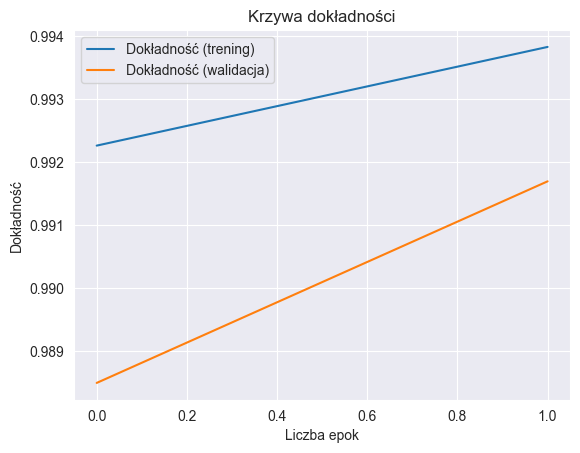

In [20]:
# Wizualizacja krzywych uczenia
plt.plot(history.history['loss'], label='Funkcja straty (trening)')
plt.plot(history.history['val_loss'], label='Funkcja straty (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Wartość funkcji straty')
plt.legend()
plt.title('Krzywa funkcji straty')
plt.show()
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Krzywa dokładności')
plt.show()

In [21]:
# predykcje
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [23]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

[ 976 1131 1020 1003  981  884  948 1018  961  995]


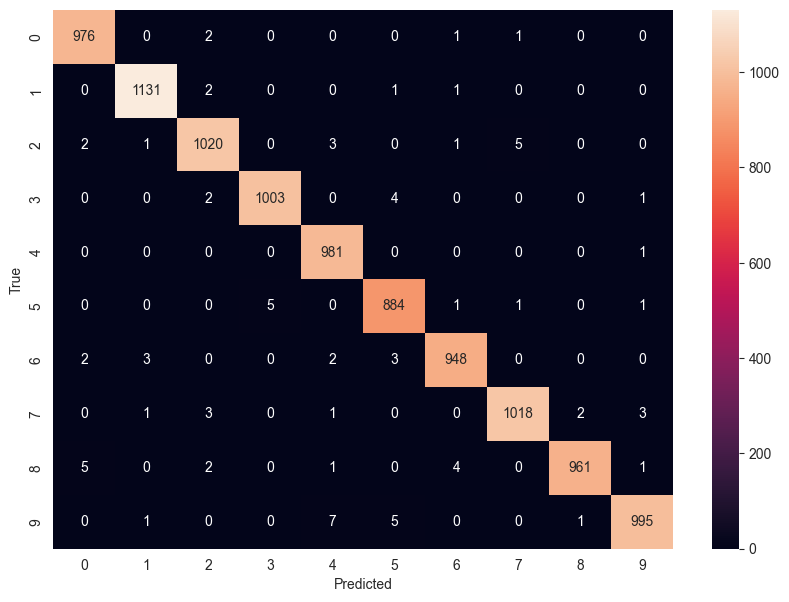

In [24]:
# Obliczenie confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm.diagonal())

# Tworzenie DataFrame z confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(10)], columns = [i for i in range(10)])

# Tworzenie heatmapy confusion matrix
plt.figure(figsize = (10,7))
sea.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()